# Determining at which age a person is most likely to commit sucide.

### Importing the relevent libraries

In [125]:
import numpy as np  # Allows us to work with arrays.
import matplotlib.pyplot as plt  # Allows working with plots.
import pandas as pd  # importing pandas’ library for use. Allows us to import data set and manipulate it.
from sklearn.compose import ColumnTransformer  # helps with encoding.
from sklearn.preprocessing import OneHotEncoder  # Does onehotencode.
from sklearn.preprocessing import LabelEncoder   # Does 1 and 0 encoding.
import seaborn as sns  # Allows to polt beautiful plots
import matplotlib.pyplot as plt # plotting

### Importing the dataframe

In [126]:
sucidedataframe = pd.read_csv("who_suicide_statistics.csv")  # opens csv files and assighns them to a variable.

### Checking the data from the dataframe before pre-processing

In [127]:
sucidedataframe.head(1)  # Taking a look at the dataframe the first elements of the dataset.

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0


In [128]:
sucidedataframe.info()  # checking Basic information on the dataframe being procesed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


## 1. Data pre-processing

In [129]:
sucidedataframe.columns  # The columns of the dataframe are viewed.

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population'], dtype='object')

In [130]:
# Below relevent data is selected that will be used in this project.
sucidedataframe = sucidedataframe[["age", "sex", "population", "suicides_no", "suicides_no"]]
sucidedataframe.head(1)  # Taking a look at the dataframe to see if the needed changes have been made.

,age,sex,population,suicides_no,suicides_no
0,15-24 years,female,277900.0,NaN,NaN


In [131]:
# Below the col names are renamed.
sucidedataframe = sucidedataframe.set_axis(["Age", "Gender", "Population", "Suicide_Committed_num", "Suicide_Committed"],axis=1)
sucidedataframe.head(1)  # Taking a look at the dataframe to see if the needed changes have been made.

,Age,Gender,Population,Suicide_Committed_num,Suicide_Committed
0,15-24 years,female,277900.0,NaN,NaN


In [132]:
sucidedataframe.shape  # The Entries and the columns of the dataframe are viewed.

(43776, 5)

### Dealing with null values

In [133]:
sucidedataframe.isnull().sum()  # Checking the dataframe for null values.

Age                         0
Gender                      0
Population               5460
Suicide_Committed_num    2256
Suicide_Committed        2256
dtype: int64

In [134]:
print('The age range 5-14 years years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '5-14 years'])) + ' times.')
print('The age range 15-24 years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '15-24 years'])) + ' times.')
print('The age range 25-34 years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '25-34 years'])) + ' times.')
print('The age range 35-54 years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '35-54 years'])) + ' times.')
print('The age range 55-74 years years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '55-74 years'])) + ' times.')
print('The age range 75+ years years years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '75+ years'])) + ' times.')

The age range 5-14 years years years appears 7296 times.
The age range 15-24 years appears 7296 times.
The age range 25-34 years years appears 7296 times.
The age range 35-54 years years appears 7296 times.
The age range 55-74 years years years appears 7296 times.
The age range 75+ years years years years appears 7296 times.


In [135]:
sucidedataframe = sucidedataframe.dropna() # droping all rows with at least one null values.

In [136]:
print('The age range 5-14 years years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '5-14 years'])) + ' times.')
print('The age range 15-24 years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '15-24 years'])) + ' times.')
print('The age range 25-34 years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '25-34 years'])) + ' times.')
print('The age range 35-54 years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '35-54 years'])) + ' times.')
print('The age range 55-74 years years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '55-74 years'])) + ' times.')
print('The age range 75+ years years years years appears ' + str(len(sucidedataframe[sucidedataframe['Age'] == '75+ years'])) + ' times.')

The age range 5-14 years years years appears 6010 times.
The age range 15-24 years appears 6010 times.
The age range 25-34 years years appears 6010 times.
The age range 35-54 years years appears 6010 times.
The age range 55-74 years years years appears 6010 times.
The age range 75+ years years years years appears 6010 times.


In [137]:
sucidedataframe.shape  # The Entries and the columns of the dataframe are viewed.

(36060, 5)

In [138]:
sucidedataframe.describe().round()  # Shows the count, mean, std, min, 25%, 50%, 75% and 
                                    # max of a datframe. Could be useful for feature scaling afterwords.

,Population,Suicide_Committed_num,Suicide_Committed
count,36060.0,36060.0,36060.0
mean,1699996.0,222.0,222.0
std,3697811.0,855.0,855.0
min,259.0,0.0,0.0
25%,80566.0,2.0,2.0
50%,375765.0,21.0,21.0
75%,1344900.0,116.0,116.0
max,43805214.0,22338.0,22338.0


In [139]:
sucidedataframe.info()  # checking Basic information on the dataframe being procesed.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36060 entries, 24 to 43763
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    36060 non-null  object 
 1   Gender                 36060 non-null  object 
 2   Population             36060 non-null  float64
 3   Suicide_Committed_num  36060 non-null  float64
 4   Suicide_Committed      36060 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.7+ MB


In [140]:
sucidedataframe.isnull().sum()  # Checking the dataframe for null values.

Age                      0
Gender                   0
Population               0
Suicide_Committed_num    0
Suicide_Committed        0
dtype: int64

In [141]:
print(sucidedataframe.pivot_table(columns=['Suicide_Committed'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Suicide_Committed
0.0        5936
1.0        2146
2.0        1489
3.0        1129
4.0         907
           ... 
20705.0       1
21063.0       1
21262.0       1
21706.0       1
22338.0       1
Length: 2231, dtype: int64


### initial plot to visulize the data before working on it.

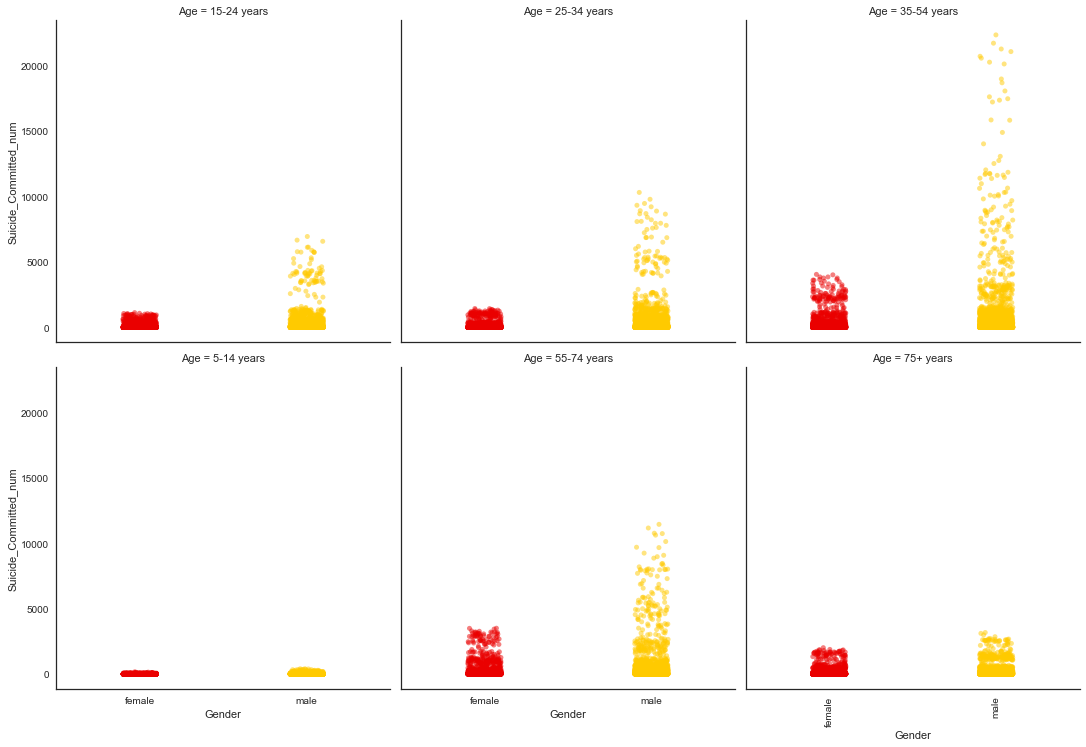

In [142]:
plt.rcParams['figure.figsize'] = (13, 7)
plt.style.use('seaborn-white')
sns.catplot(x='Gender', y="Suicide_Committed_num", col="Age", col_wrap=3, sharey=True, data=sucidedataframe, alpha=0.5, palette = 'hot')
plt.xticks(rotation = 90)
plt.show()

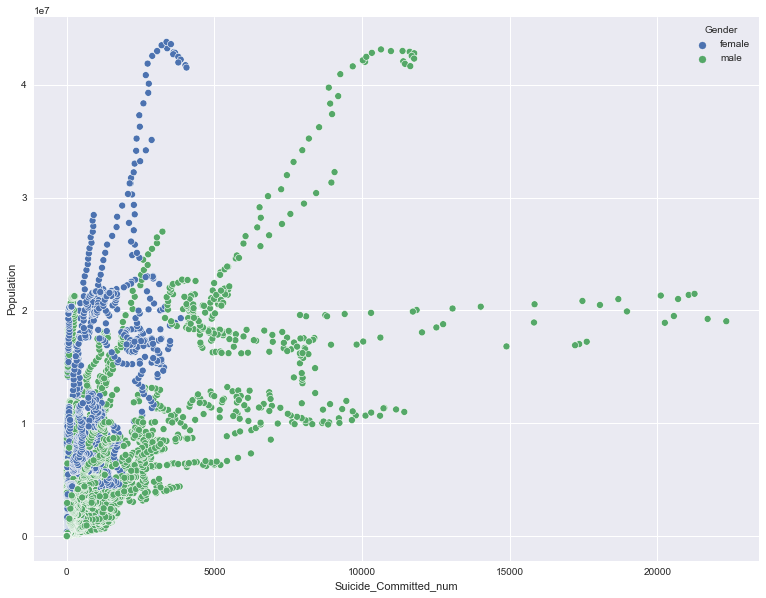

In [143]:
plt.style.use('seaborn')
plt.figure(figsize= (13,10))
sns.scatterplot(x= 'Suicide_Committed_num', y= 'Population', data = sucidedataframe, hue = 'Gender')
plt.show()

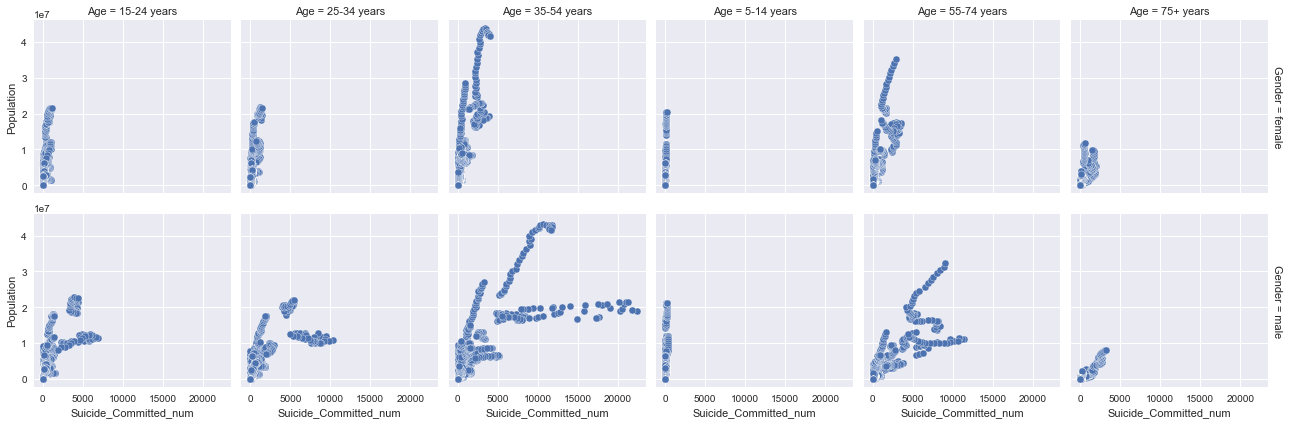

In [144]:
My_plot_object = sns.FacetGrid(sucidedataframe , row = 'Gender',col = 'Age',margin_titles=True)
My_plot_object.map(plt.scatter,"Suicide_Committed_num",'Population',edgecolor = 'w')
plt.show()

### Encoding Classification variables yes and no

In [145]:
le = LabelEncoder()
sucidedataframe.Gender = le.fit_transform(sucidedataframe.Gender)

In [146]:
sucidedataframe.head()

,Age,Gender,Population,Suicide_Committed_num,Suicide_Committed
24,15-24 years,0,289700.0,14.0,14.0
25,25-34 years,0,257200.0,4.0,4.0
26,35-54 years,0,278800.0,6.0,6.0
27,5-14 years,0,311000.0,0.0,0.0
28,55-74 years,0,144600.0,0.0,0.0


In [147]:
print(sucidedataframe.pivot_table(columns=['Suicide_Committed'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Suicide_Committed
0.0        5936
1.0        2146
2.0        1489
3.0        1129
4.0         907
           ... 
20705.0       1
21063.0       1
21262.0       1
21706.0       1
22338.0       1
Length: 2231, dtype: int64


In [148]:
sucidedataframe.loc[sucidedataframe.Suicide_Committed > 0, "Suicide_Committed"] = 1  # Encoding everthig above 0 to 1.

In [149]:
print(sucidedataframe.pivot_table(columns=['Suicide_Committed'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Suicide_Committed
0.0     5936
1.0    30124
dtype: int64


In [150]:
sucidedataframe['Suicide_Committed'] = sucidedataframe['Suicide_Committed'].astype(np.int64)  # converting float to int.

In [151]:
print(sucidedataframe.pivot_table(columns=['Suicide_Committed'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Suicide_Committed
0     5936
1    30124
dtype: int64


### selecting X and Y values 

In [152]:
X = sucidedataframe.iloc[:, 0:3].values  # selecting the values for the X variable.

In [153]:
Y = sucidedataframe[["Suicide_Committed"]].to_numpy()  # selecting the values for the Y variable. # done using .to_numpy and not 
                                                       # .iloc as .to_numpy creates a horizontal bar while .iloc creates a 
                                                       # horizontal bar which will not alighn with the x values.

In [154]:
sucidedataframe.head(3)

,Age,Gender,Population,Suicide_Committed_num,Suicide_Committed
24,15-24 years,0,289700.0,14.0,1
25,25-34 years,0,257200.0,4.0,1
26,35-54 years,0,278800.0,6.0,1


In [155]:
sucidedataframe.head()  # Taking a look at the dataframe the first elements of the dataset.

,Age,Gender,Population,Suicide_Committed_num,Suicide_Committed
24,15-24 years,0,289700.0,14.0,1
25,25-34 years,0,257200.0,4.0,1
26,35-54 years,0,278800.0,6.0,1
27,5-14 years,0,311000.0,0.0,0
28,55-74 years,0,144600.0,0.0,0


In [156]:
sucidedataframe.head()  # Taking a look at the dataframe the first elements of the dataset.

,Age,Gender,Population,Suicide_Committed_num,Suicide_Committed
24,15-24 years,0,289700.0,14.0,1
25,25-34 years,0,257200.0,4.0,1
26,35-54 years,0,278800.0,6.0,1
27,5-14 years,0,311000.0,0.0,0
28,55-74 years,0,144600.0,0.0,0


In [157]:
print(X)  # Printing numpy array X.

[['15-24 years' 0 289700.0]
 ['25-34 years' 0 257200.0]
 ['35-54 years' 0 278800.0]
 ...
 ['5-14 years' 1 7291.0]
 ['55-74 years' 1 12615.0]
 ['75+ years' 1 2496.0]]


In [158]:
print(Y)  # Printing numpy array Y.

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


### One Hot Encoding

In [159]:
# count duplicates function learned from: https://datatofish.com/count-duplicates-pandas/
sucidedataframe.pivot_table(columns=['Age'], aggfunc='size')  # counts duplicates in the selected dataframe column.

Age
15-24 years    6010
25-34 years    6010
35-54 years    6010
5-14 years     6010
55-74 years    6010
75+ years      6010
dtype: int64

In [160]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')    
# transformers= [('what to do', method , [index of column to apply method on])]
# remainder='what to do with the remaining columns'

X = np.array(ct.fit_transform(X))  # applies the above method on the given array.

In [161]:
print(X)  # Printing numpy array X.

[[1.0 0.0 0.0 ... 0.0 0 289700.0]
 [0.0 1.0 0.0 ... 0.0 0 257200.0]
 [0.0 0.0 1.0 ... 0.0 0 278800.0]
 ...
 [0.0 0.0 0.0 ... 0.0 1 7291.0]
 [0.0 0.0 0.0 ... 0.0 1 12615.0]
 [0.0 0.0 0.0 ... 1.0 1 2496.0]]


In [162]:
X = np.delete(X, -1, 1)  # delete second column of C

In [163]:
print(X)  # Printing numpy array Y.

[[1.0 0.0 0.0 ... 0.0 0.0 0]
 [0.0 1.0 0.0 ... 0.0 0.0 0]
 [0.0 0.0 1.0 ... 0.0 0.0 0]
 ...
 [0.0 0.0 0.0 ... 0.0 0.0 1]
 [0.0 0.0 0.0 ... 1.0 0.0 1]
 [0.0 0.0 0.0 ... 0.0 1.0 1]]


In [164]:
sucidedataframe.head(2)  # Taking a look at the dataframe the first elements of the dataset.

,Age,Gender,Population,Suicide_Committed_num,Suicide_Committed
24,15-24 years,0,289700.0,14.0,1
25,25-34 years,0,257200.0,4.0,1


### Selecting X2 and Y2 values

In [165]:
X2 = sucidedataframe[["Age","Suicide_Committed_num" ,"Population"]].to_numpy()  # selecting the values for the X2 variable.

In [166]:
Y2 = sucidedataframe[["Gender"]].to_numpy()  # selecting the values for the Y2 variable.

In [167]:
print(X2)  # Printing numpy array X2.

[['15-24 years' 14.0 289700.0]
 ['25-34 years' 4.0 257200.0]
 ['35-54 years' 6.0 278800.0]
 ...
 ['5-14 years' 0.0 7291.0]
 ['55-74 years' 0.0 12615.0]
 ['75+ years' 0.0 2496.0]]


In [168]:
print(Y2)  # Printing numpy array Y2.

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


### One Hot Encoding

In [169]:
X2 = np.array(ct.fit_transform(X2))  # applies the above method on the given array.

In [170]:
print(X2)  # Printing numpy array X2.

[[1.0 0.0 0.0 ... 0.0 14.0 289700.0]
 [0.0 1.0 0.0 ... 0.0 4.0 257200.0]
 [0.0 0.0 1.0 ... 0.0 6.0 278800.0]
 ...
 [0.0 0.0 0.0 ... 0.0 0.0 7291.0]
 [0.0 0.0 0.0 ... 0.0 0.0 12615.0]
 [0.0 0.0 0.0 ... 1.0 0.0 2496.0]]


In [175]:
# %run MyOtherNotebook.ipynb use later to seprate code in note book.

### Feature Scaling 

In [176]:
# look it up as your about to finish this report.
# (Adeline, 2020) has a very creative idea to compare models at the end.
# you can make it even better by using visusals.ss